In [1]:
#Import modules
import pandas as pd
import numpy as np

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Read in data : Creating a dataframe : Importing data into pyhton environment
df=pd.read_csv("AutoInsurance.csv")
#head() by default, show the first 5 records
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#Check the shape (number of columns and rows) in the dataset
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [4]:
#Renaming the column name of the dataframe
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [5]:
#shows the varibales present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# To get numerical and non-numerical columns 
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [7]:
#shows the variable names present in the dataframe
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [8]:
#Renaming the column name of the dataframe
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

## Summary Statistics of Numerical features

In [9]:
# Shows summary statistics and variables 
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


## Checking Null values

In [10]:
#shows the missing values at individual variable level
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

there is no null values in the data

## EDA

## Numerical Features

### CLV - Target variable analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


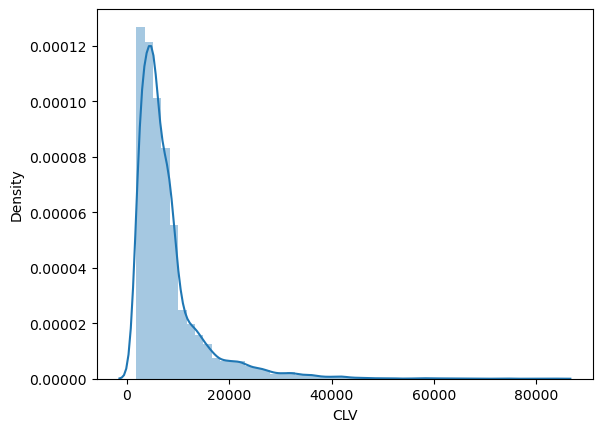

In [11]:
#Histogram for CLV
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


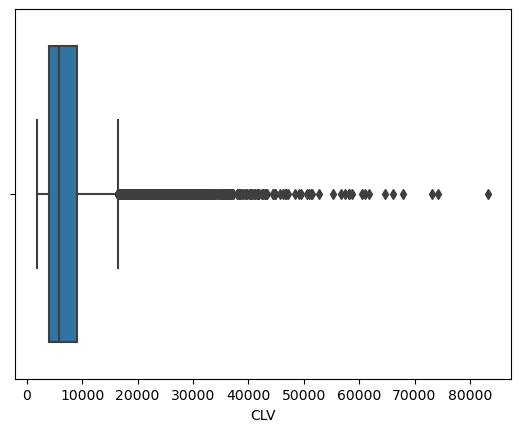

In [12]:
#Box-Plot for multiple numerical variables - CLV
sns.boxplot(df["CLV"])
plt.show()

In [13]:
df["CLV"].skew()

3.0322802599299847

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

### Income

**Univariate Analysis**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


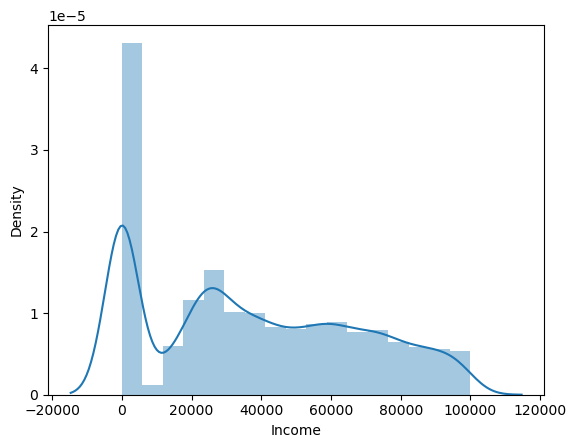

In [14]:
#Histogram for Income
sns.distplot(df["Income"])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


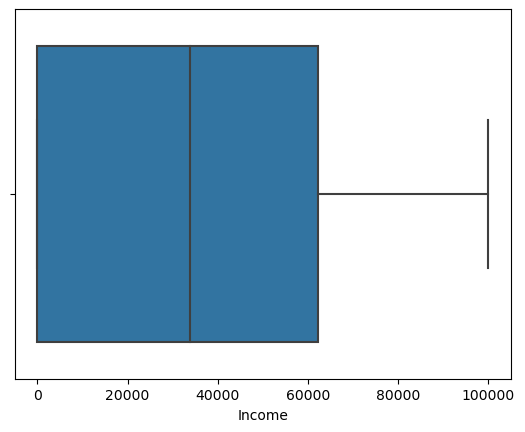

In [15]:
#Box-Plot for multiple numerical variables - Income
sns.boxplot(df["Income"])
plt.show()

**Bivariate Analysis**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


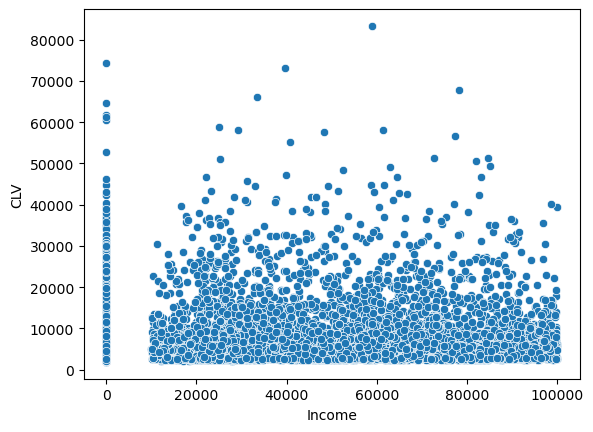

In [16]:
sns.scatterplot(df["Income"],df["CLV"])
plt.show()

There is no linear relationship between income and CLV

### Monthly Premium Auto

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


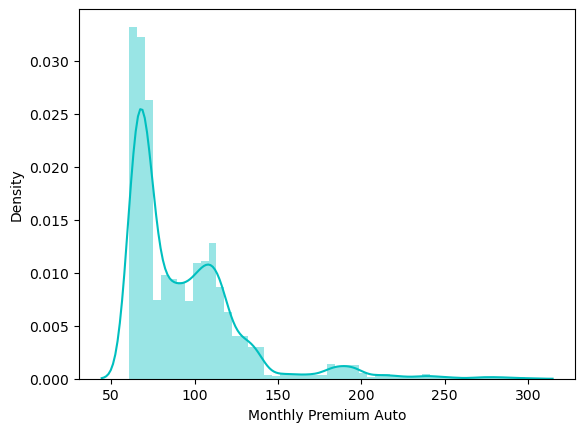

In [17]:
#Histogram for Monthly Premium Auto
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


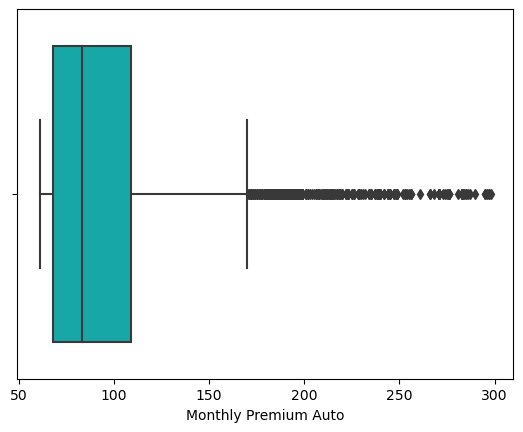

In [18]:
#Box-Plot for multiple numerical variables -MonthlyPremiumAuto 
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

**Bivariate Analysis**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


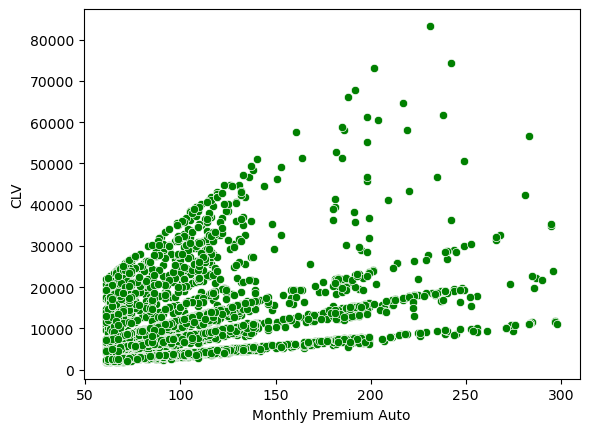

In [19]:
#Scatter plot for CLV and Monthly Premium Auto
sns.scatterplot(df["Monthly Premium Auto"],df["CLV"],color='g')
# plt.savefig("bi.png")
plt.show()

There is linear relationship between income and CLV

### Months Since Last Claim

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


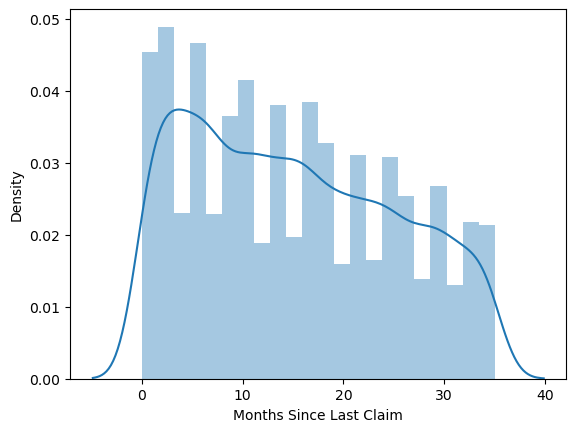

In [20]:
#Histogram for Months Since Last Claim
sns.distplot(df['Months Since Last Claim'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


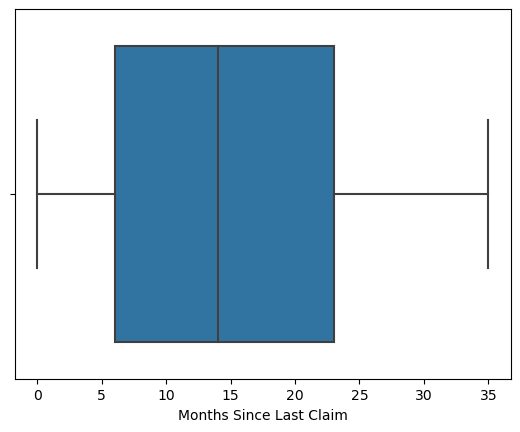

In [21]:
#Box-Plot for multiple numerical variables - MonthsSinceLastClaim
sns.boxplot(df["Months Since Last Claim"])
plt.show()

**Bivariate Analysis**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


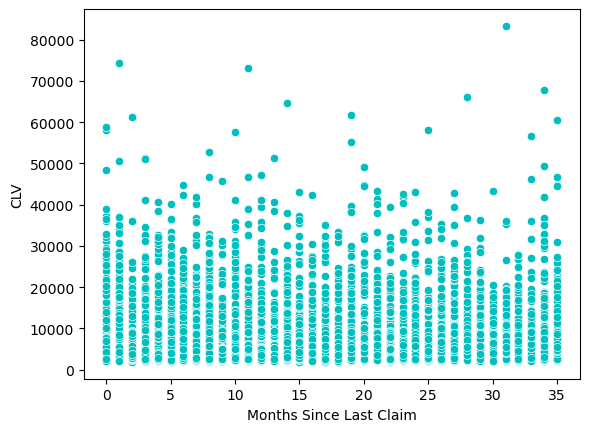

In [22]:
# Plot between Months Since Last Claim as Independent variable and CLV as dependent variable.
sns.scatterplot(df["Months Since Last Claim"],df["CLV"],color='c')
plt.show()

There is no linear relationship

### Months Since Policy Inception

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


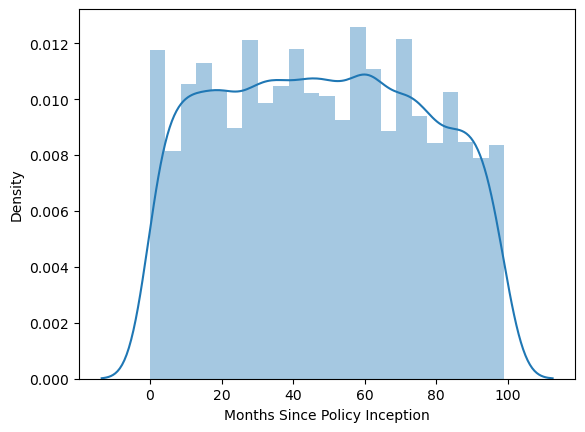

In [23]:
#Histogram for Months Since Policy Inception
sns.distplot(df['Months Since Policy Inception'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


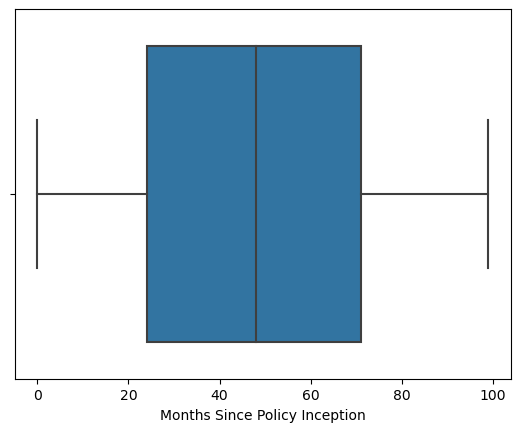

In [24]:
#Box-Plot for multiple numerical variables - MonthsSincePolicyInception
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

### Total claim amount

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


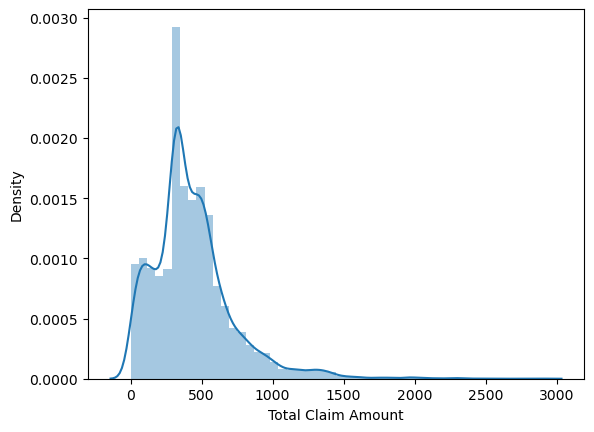

In [25]:
#Histogram for Total Claimed Amount
sns.distplot(df['Total Claim Amount'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


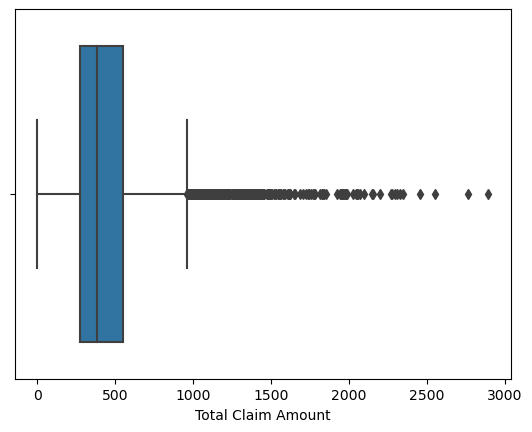

In [26]:
#Box-Plot for multiple numerical variables - Total Claim Amount
sns.boxplot(df["Total Claim Amount"])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


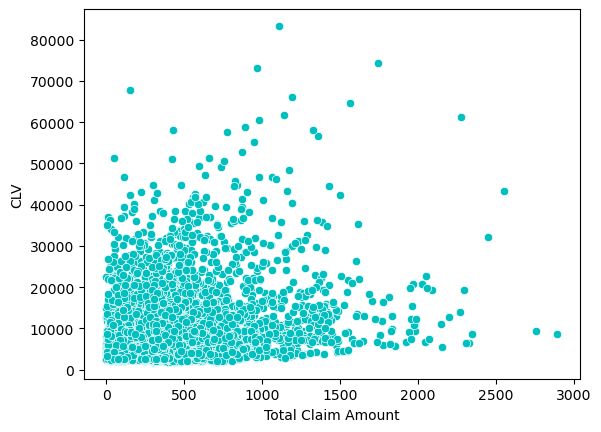

In [27]:
#Analyzing the relationship between CLV and Total Amount Claimed
sns.scatterplot(df["Total Claim Amount"],df["CLV"],color='c')
plt.show()

There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


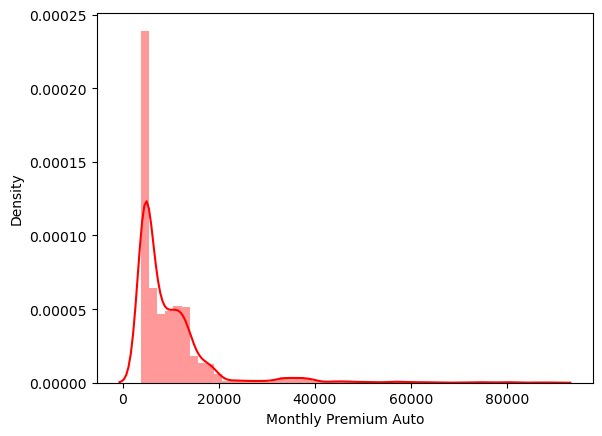

In [28]:
#Histogram for Monthly Premium Auto in red color
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


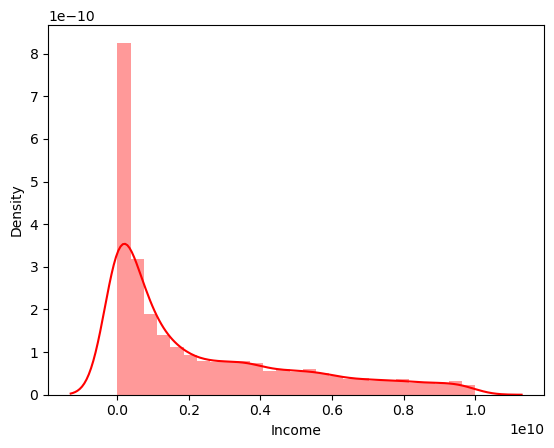

In [29]:
#Histogram for Monthly Premium Auto in red color
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

## Categorical variables

In [30]:
cat_cols = df.select_dtypes(include="object")

In [31]:
#Renaming the column name of the dataframe
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [32]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [33]:
#head() by default to show the first 5 records
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [34]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [35]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [36]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance

### State

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


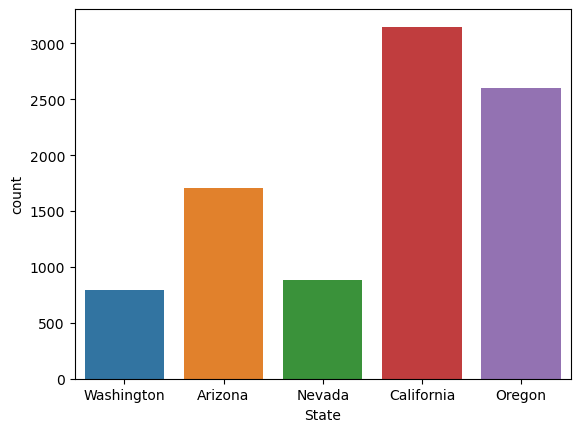

In [37]:
# Displaying the more people lived in the states
sns.countplot(df["State"])
plt.show()

Most number of people are residing in california

### Response

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


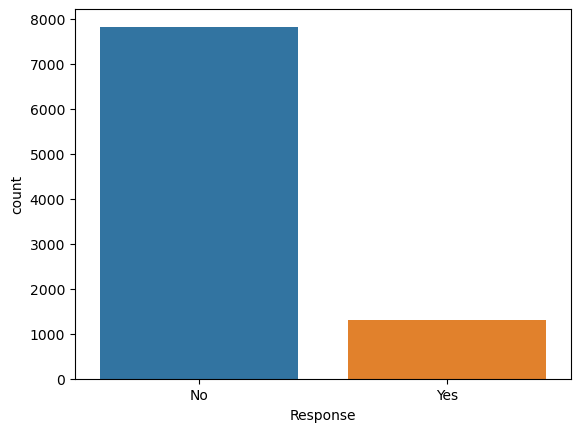

In [38]:
# shows who resopnds the marketing calls
sns.countplot(df["Response"])
plt.show()

Its seems that less than 1400 customers have responded to the marketing calls

### Coverage

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


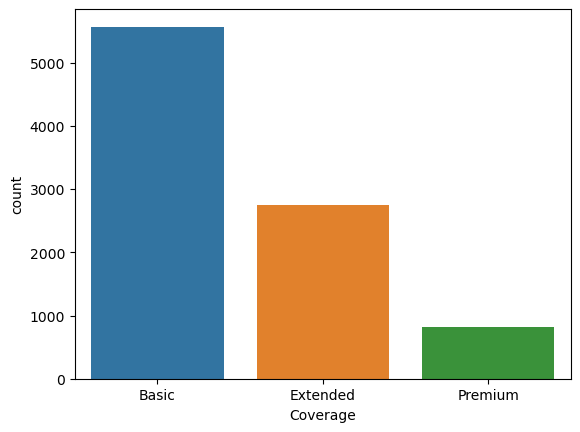

In [39]:
# Coverage type vs Average CLV
sns.countplot(df["Coverage"])
plt.show()

### Education

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


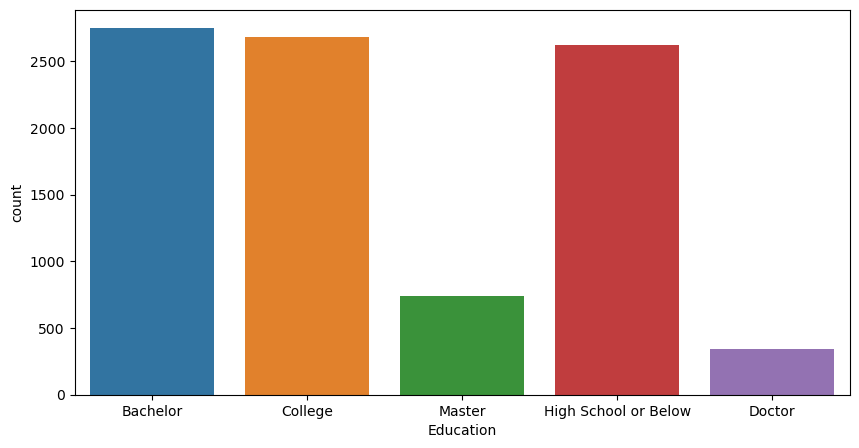

In [40]:
# Bar chart to analyse the persons education details
plt.figure(figsize=(10,5))
sns.countplot(df["Education"])
plt.show()

Most of the customers have either a bachelor or college degree

### EmploymentStatus

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


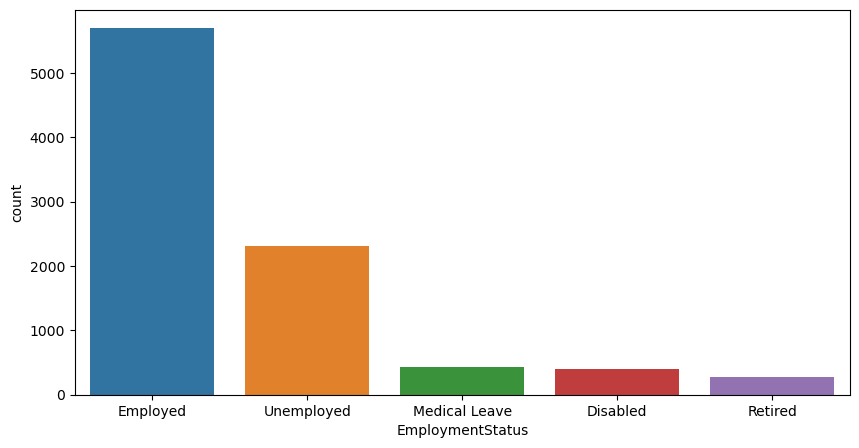

In [41]:
# Bar Chart to analyse the relationship between EmploymentStatus and CLV
plt.figure(figsize=(10,5))
sns.countplot(df["EmploymentStatus"])
# plt.savefig("empstatus.png")
plt.show()

In [42]:
# to show the employment percentage
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

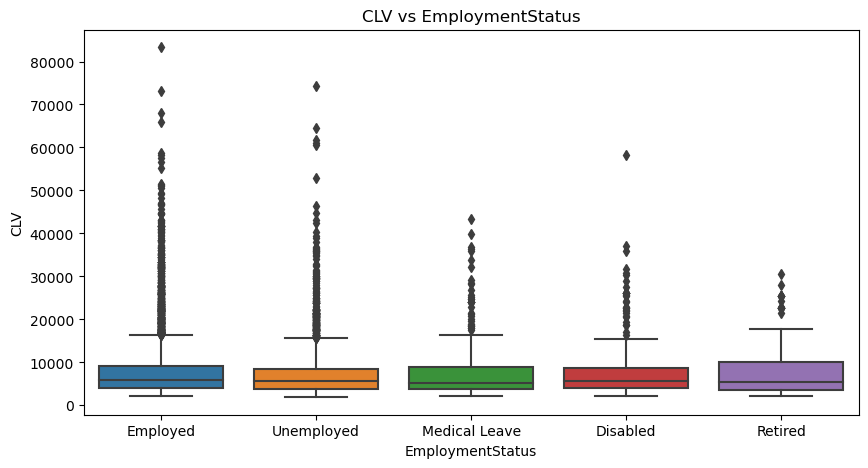

In [43]:
# Boxplot to check the distribution of CLV with respect to Employment Status
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
# plt.savefig("bi1.png")
plt.show()

### Gender

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


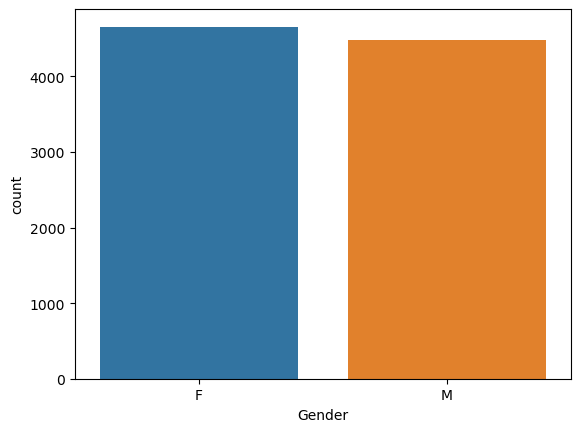

In [44]:
# Gender vs CLV analysis
sns.countplot(df["Gender"])
plt.show()

### Location Code

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


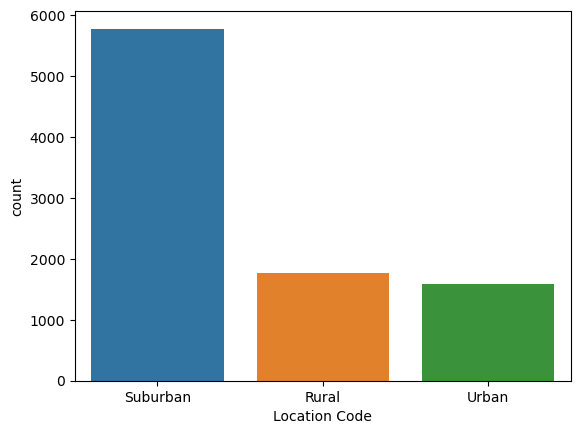

In [45]:
# Further analysis of Sales Channel vs Average CLV for states based on location code
sns.countplot(df["Location Code"])
plt.savefig("location.png")
plt.show()

### Marital Status

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


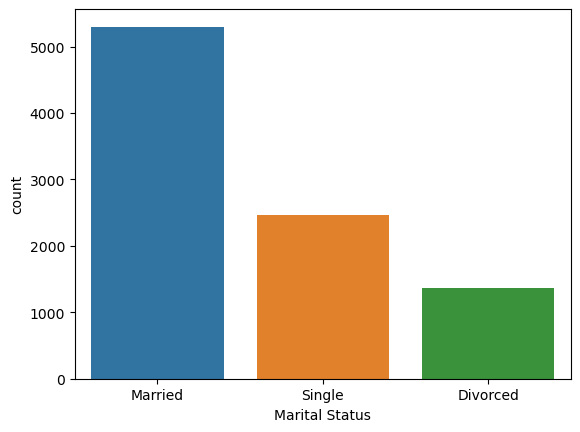

In [46]:
# Bar Chart for showing Marital Status 
sns.countplot(df["Marital Status"])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


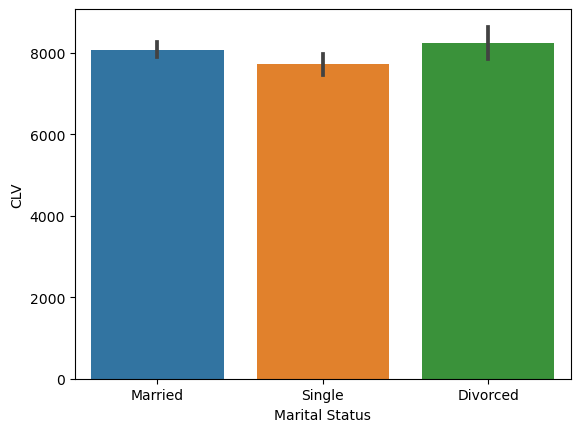

In [47]:
# Bar Chart for Showing Marital Status and CLV
sns.barplot(df["Marital Status"],df["CLV"])
plt.show()

### Policy Type

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


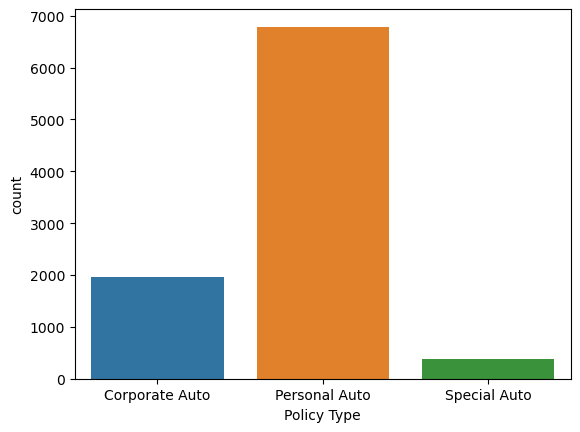

In [48]:
# Bar Chart to analyse the relationship between Policy and CLV
sns.countplot(df["Policy Type"])
plt.show()

### Policy

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


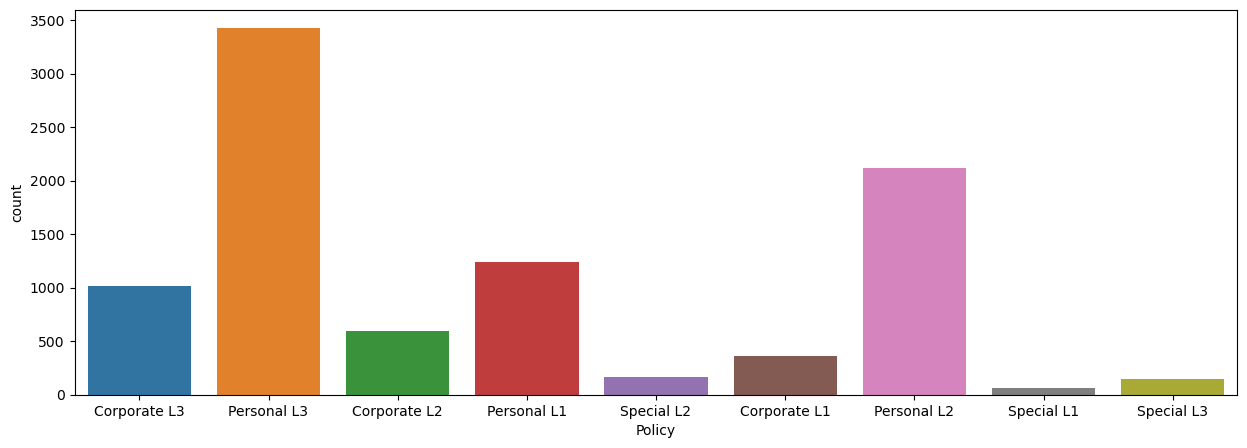

In [49]:
# Bra Chart for showing policy and CLV
plt.figure(figsize=(15,5))
sns.countplot(df["Policy"])
plt.show()

### Renew Offer type

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


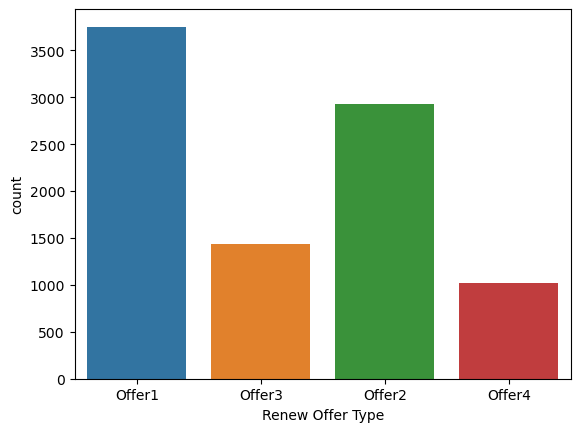

In [50]:
# Bar Chart for showing Renew offer type
sns.countplot(df["Renew Offer Type"])
plt.show()

### Sales Channel

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


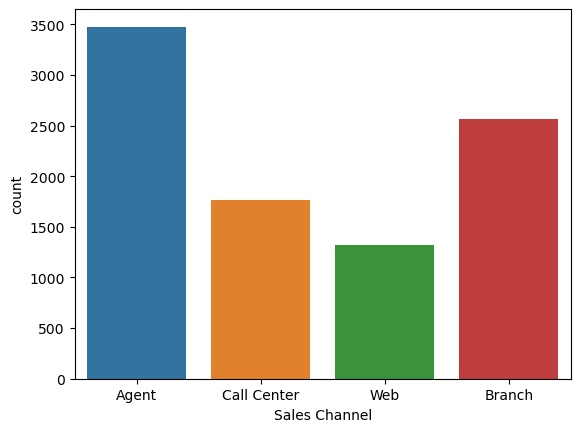

In [51]:
# Bar Chart for showing sales channel
sns.countplot(df["Sales Channel"])
plt.show()

### Vehicle Class

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


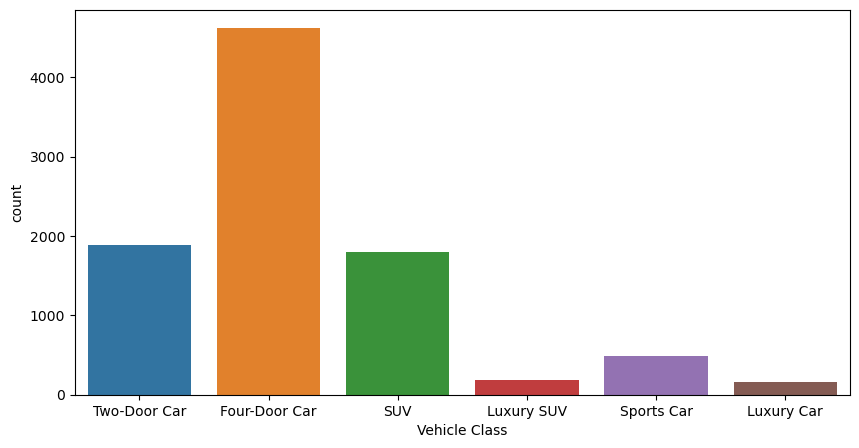

In [52]:
# Understanding the relationship between average CLV and customer's vehicle class
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Class"])
plt.show()

### Vehicle Size

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


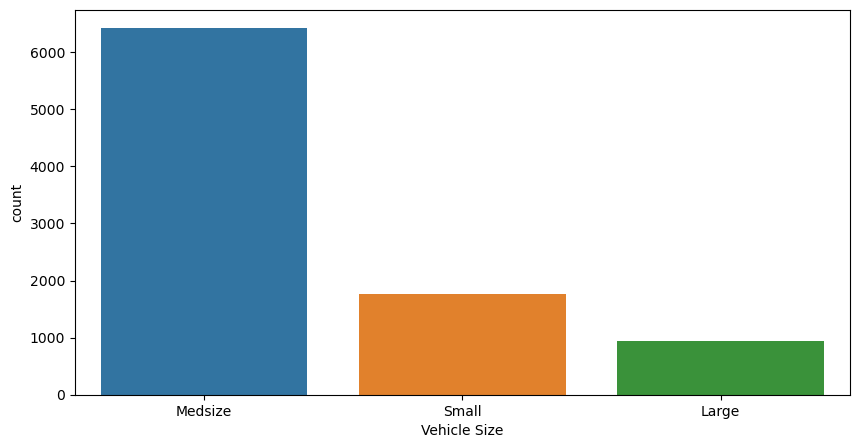

In [53]:
# Bar Chart for showing size of the vehicle
plt.figure(figsize=(10,5))
sns.countplot(df["Vehicle Size"])
plt.show()

### Number of Open Complaints

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


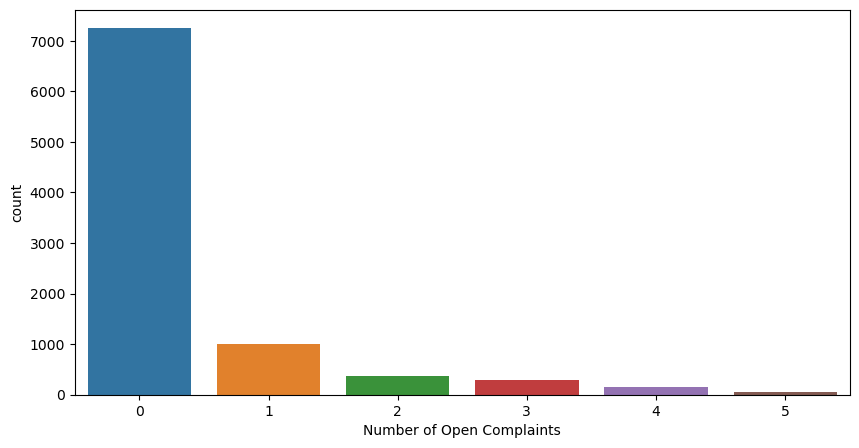

In [54]:
# Bar Chart to analyse the Number of open complaints and CLV
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Open Complaints"])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


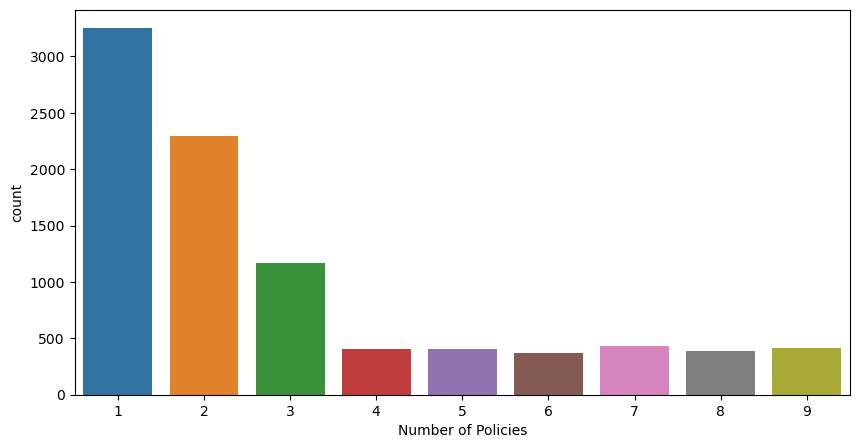

In [55]:
# Bar chart to analyse the Number Of Policies
plt.figure(figsize=(10,5))
sns.countplot(df["Number of Policies"])
plt.show()

In [56]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [57]:
df["Months"] = df["Effective To Date"].dt.month

In [58]:
df['Months'] = df['Months'].astype('object')

### Months

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


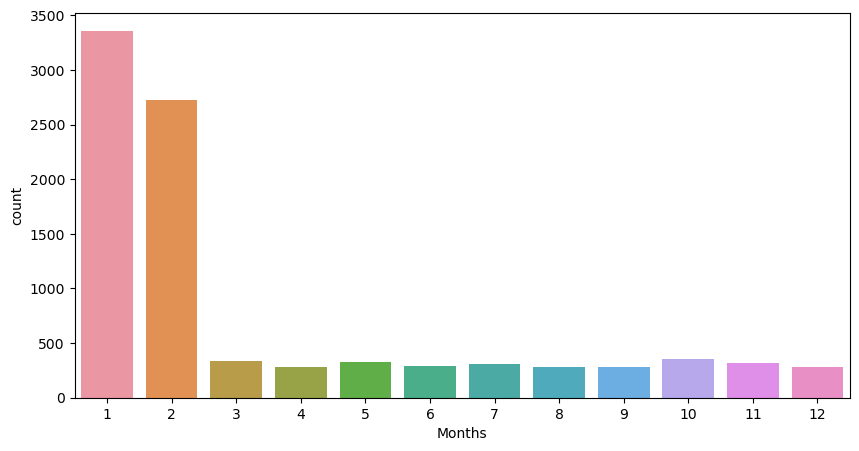

In [59]:
# Bar chart to analyse the months
plt.figure(figsize=(10,5))
sns.countplot(df["Months"])
plt.show()

In [60]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [61]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

## HeatMap

In [62]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

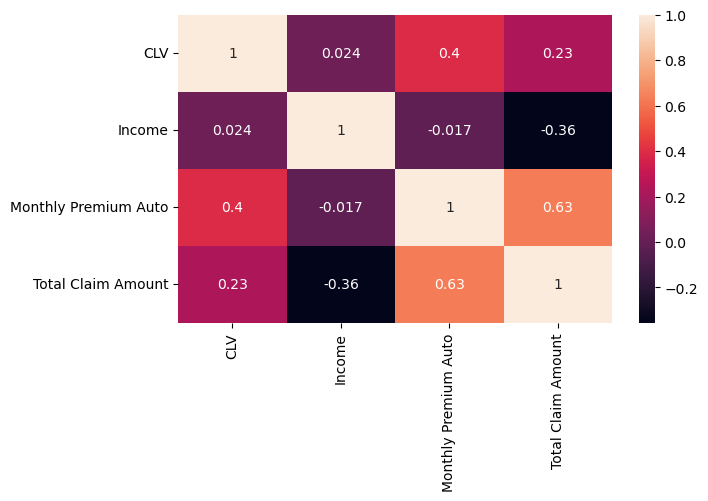

In [63]:
# Get the correlation matrix to check multicolinearity
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.


## Statistical Significance

In [64]:
stats.shapiro(df['CLV'])

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

In [65]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [66]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


In [67]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLV', ylabel='Density'>

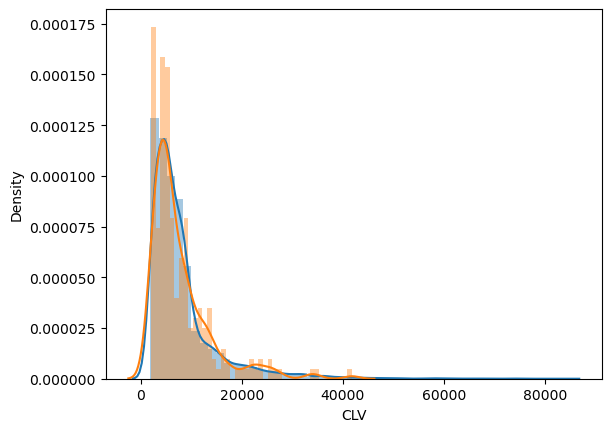

In [68]:
# Dist plot for response and CLV
sns.distplot(yes)
sns.distplot(no)

In [69]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


In [70]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [71]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [72]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [73]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


In [74]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [75]:
# df.rename(columns={'CLV':'CLV'},inplace=True)

In [76]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

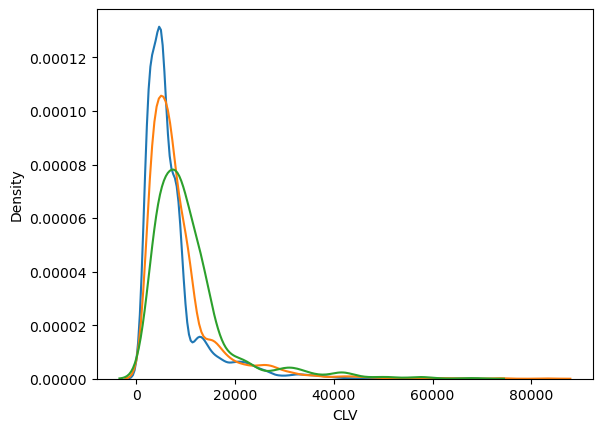

In [77]:
# Dist Plot for Coverage and CLV
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.show()

In [78]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


In [79]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [80]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [81]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

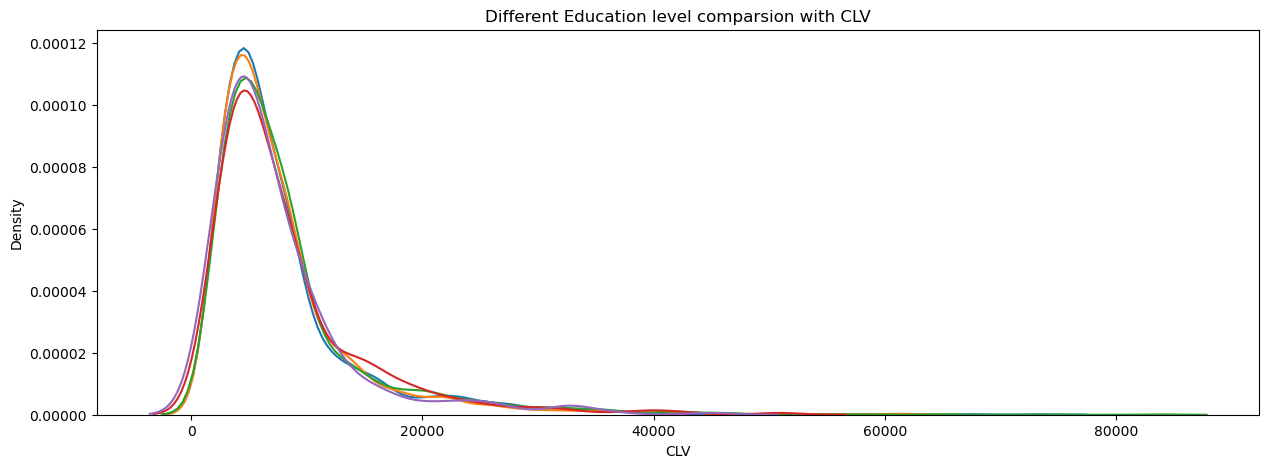

In [82]:
# Dist plot for education level and CLV
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")
plt.show()

In [83]:
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']

In [84]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


In [85]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']

In [86]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


In [87]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']

In [88]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


In [89]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']

In [90]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


In [91]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']

In [92]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


In [93]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']

In [94]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


In [95]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']

In [96]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


In [97]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']

In [98]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


In [99]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']

In [100]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


In [101]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']

In [102]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


In [103]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']

In [104]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


In [105]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [106]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [107]:
cat_cols

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [108]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]

In [109]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [110]:
len(p_values)

16

In [111]:
len(cat_cols.columns)

16

In [112]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


In [113]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [114]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [115]:
import statsmodels.api as sm

In [116]:
# X=numerical_cols.drop(['CLV'],axis=1)
# y=numerical_cols['CLV']
# lin_reg=sm.OLS(y,X).fit()
# lin_reg.summary()  

## Statistical Significance

In [117]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [118]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [119]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [120]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## OLS Model

In [121]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [122]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Fri, 19 May 2023   Prob (F-statistic):          6.92e-323
Time:                        20:01:37   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

C:\Users\HP\AppData\Local\Temp\ipykernel_9264\1638708378.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


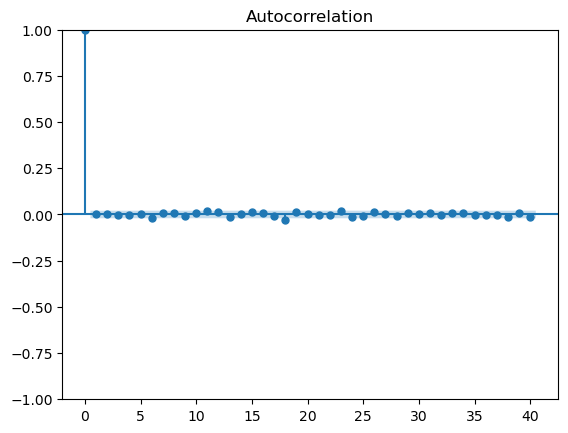

In [123]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

In [124]:
#H0: the error terms are normally distributed
#dof for residuals is n-2

In [125]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=65051.54524138232, pvalue=0.0)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


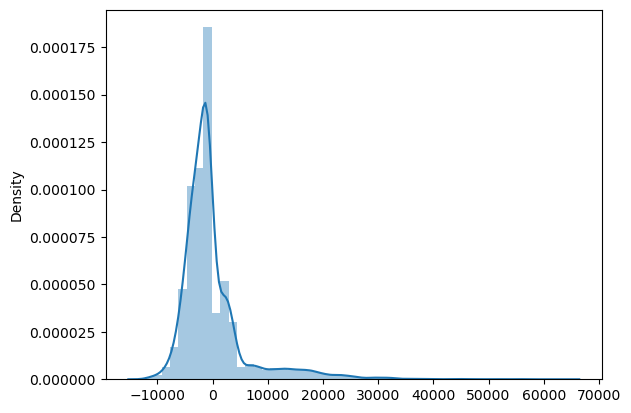

In [126]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

In [127]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.016497272996893, 0.2907128743692436)

In [128]:
lin_reg.resid.mean()

1.6473510550224778e-09

In [129]:
import statsmodels.stats.api as sms

In [130]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.2289680194898225, 2.216740369946362e-12, 'increasing')

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Open Complaints,1.009196
Number of Policies,1.019460
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


In [132]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [133]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [134]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


## Model Building

## Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.2548416026499797


In [137]:
y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [139]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5772314153487259
MAE 0.4455033282270872
R-squared: 0.2548416026499797


In [140]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']


In [141]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']]

In [142]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     228.2
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        20:01:43   Log-Likelihood:                -7694.3
No. Observations:                9134   AIC:                         1.542e+04
Df Residuals:                    9119   BIC:                         1.553e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.9001      0.024    333.289      0.000       7.854       7.947
Monthly Premium Auto               0.0070      0.000     30.864      0.000       0.007       0.007
Number of Open Complaints         -0.0317      0.006     -4.895      0.000      -0.044      -0.019
Number of Policies                 0.0529      0.002     21.385      0.000       0.048       0.058
Coverage_Extended                  0.0669      0.014      4.773      0.000       0.039       0.094
Coverage_Premium                   0.0898      0.024      3.729      0.000       0.043       0.137
Education_High School or Below     0.0336      0.013      2.567      0.010       0.008       0.059
EmploymentStatus_Employed          0.0922      0.013      7.093      0.000       0.067       0.118
Marital Status_Single             -0.0506      0.014     -3.622      0.000      -0.078      -0.023
Policy_Corporate L2               -0.0548      0.024     -2.295      0.022      -0.102      -0.008
Renew Offer Type_Offer2           -0.1199      0.014     -8.370      0.000      -0.148      -0.092
Renew Offer Type_Offer3           -0.0602      0.018     -3.416      0.001      -0.095      -0.026
Renew Offer Type_Offer4           -0.1327      0.020     -6.541      0.000      -0.172      -0.093
Vehicle Class_SUV                  0.1502      0.017      8.777      0.000       0.117       0.184
Vehicle Class_Sports Car           0.1510      0.028      5.429      0.000       0.096       0.205
==============================================================================
Omnibus:                     1476.101   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.969
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rigde and Lasso Regression

In [143]:
from sklearn.linear_model import Ridge, Lasso

In [144]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5775916080118745
R-squared: 0.25391135415166965


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [145]:
ridge=Ridge(alpha=1.0,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5925342452447083
R-squared: 0.2148084953609085


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [146]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


## Decision Tree

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [149]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## RandomForest 

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


## Hyperparameter tuning of random forest

In [152]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 100}

In [153]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.1974708193558084
MAE 0.08930809058163867
R-squared: 0.9127923591764516


In [154]:
from sklearn.ensemble import AdaBoostRegressor

In [155]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' 

AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mse',
                                                       max_depth=5),
                  n_estimators=150)

In [156]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21291185736543589
MAE 0.12730394362750208
R-squared: 0.8986209122885065


In [157]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.671953
Monthly Premium Auto,0.231553
Total Claim Amount,0.013716
Income,0.012955
Months Since Policy Inception,0.012729
Months Since Last Claim,0.012167
Coverage_Extended,0.003380
Number of Open Complaints,0.003169
EmploymentStatus_Employed,0.002863
Renew Offer Type_Offer2,0.001994


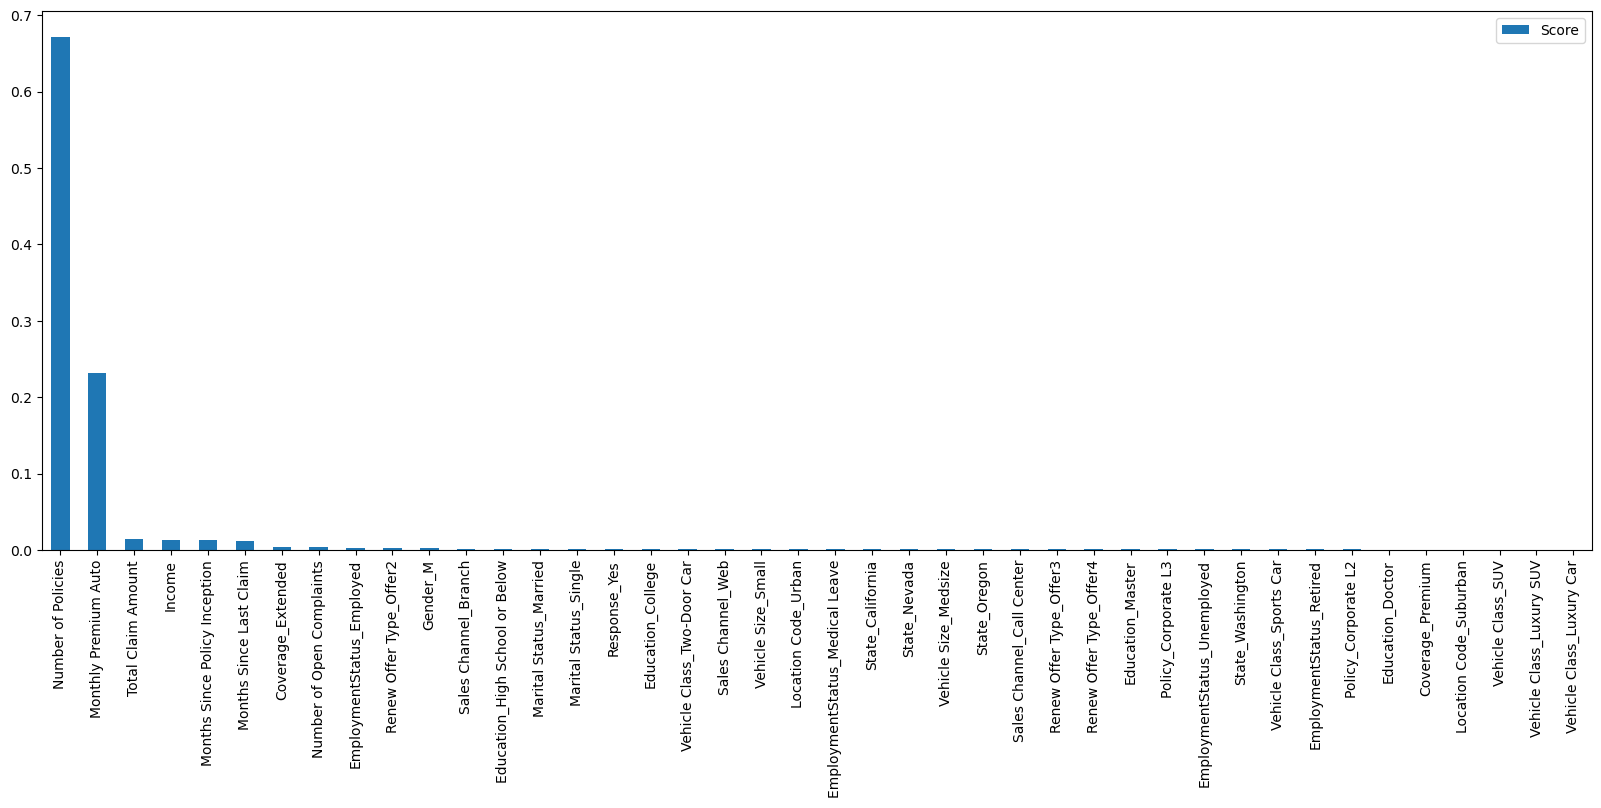

In [158]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

No of Policies and Monthly Premium are the most important features in predicting CLV